## Введение
Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».\
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!\
Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах.\
\
Файл `ferma_main.csv` содержит данные о стаде фермера на текущий момент. Описание данных:\
`id` — уникальный идентификатор коровы.\
`Удой, кг` — масса молока, которую корова даёт в год (в килограммах).\
`ЭКЕ (Энергетическая кормовая единица)` — показатель питательности корма коровы.\
`Сырой протеин, г` — содержание сырого протеина в корме (в граммах).\
`СПО (Сахаро-протеиновое соотношение)` — отношение сахара к протеину в корме коровы.\
`Порода` — порода коровы.\
`Тип пастбища` — ландшафт лугов, на которых паслась корова.\
`порода папы_быка` — порода папы коровы.\
`Жирность,%` — содержание жиров в молоке (в процентах).\
`Белок,%` — содержание белков в молоке (в процентах).\
`Вкус молока`— оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).\
`Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).\
\
Признаки в датасете `ferma_main.csv` можно разделить на группы.\
Характеристики коровы: `id`, `Порода`, `порода папы_быка`, `Возраст`\
Характеристики корма: `ЭКЕ (Энергетическая кормовая единица)`, `Сырой протеин, г`, `СПО (Сахаро-протеиновое соотношение)`.\
Характеристика пастбища: `Тип пастбища`.\
Характеристики молока: `Удой, кг`, `Жирность,%`, `Белок,%`, `Вкус молока`.\
Такое разделение поможет вам понять, как взаимосвязаны признаки в датасете.\
\
Файл `ferma_dad.csv` хранит имя папы каждой коровы в стаде фермера. Описание данных:\
`id` — уникальный идентификатор коровы.\
`Имя Папы` — имя папы коровы.\
\
Файл `cow_buy.csv` — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:\
`Порода` — порода коровы.\
`Тип пастбища` — ландшафт лугов, на которых паслась корова.\
`порода папы_быка` — порода папы коровы.\
`Имя_папы` — имя папы коровы.\
`Текущая_жирность,%` — содержание жиров в молоке (в процентах).\
`Текущий_уровень_белок,%` — содержание белков в молоке (в процентах).\
`Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

## Загрузка данных

Импортирование библиотек

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, recall_score, precision_score, confusion_matrix

Загрузка данных 'ferma_main.csv'

In [3]:
try:
    ferma_main=pd.read_csv('/datasets/ferma_main.csv', delimiter=';')
except FileNotFoundError:
    ferma_main=pd.read_csv('ferma_main.csv', delimiter=';')

Загрузка данных 'ferma_dad.csv'

In [4]:
try:
    ferma_dad=pd.read_csv('/datasets/ferma_dad.csv', delimiter=';')
except FileNotFoundError:
    ferma_dad=pd.read_csv('ferma_dad.csv', delimiter=';')

Загрузка данных 'cow_buy.csv'

In [5]:
try:
    cow_buy=pd.read_csv('/datasets/cow_buy.csv', delimiter=';')
except FileNotFoundError:
    cow_buy=pd.read_csv('cow_buy.csv', delimiter=';')

<b>Вывод:</b>

    - Были импортированы все библиотеки для их дальнейшего использования
    - Были загружены датасеты 
        1)ferma_main.csv 
        2)ferma_dad.csv 
        3)cow_buy.csv 

##  Предобработка данных

Обьединение данных ferma_main и ferma_dad

In [6]:
ferma_main_dad=pd.merge(ferma_main, ferma_dad, on='id')

Просмотр информации о данных ferma_main

In [7]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

Просмотр первых пяти строк в ferma_main

In [8]:
ferma_main.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


По данным можно сразу сказать, что столбик id лишний, явных пропусков нет, тип обьектов нужно поменять

Просмотр последних пяти строк в ferma_main

In [9]:
ferma_main.tail()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
629,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
630,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
631,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
632,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
633,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет


Удаление столбца 'id' из данных

In [10]:
ferma_main.drop(columns=['id'], inplace=True)

Просмотр информации о данных ferma_dad

In [11]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


По данным можно сразу сказать, строк меньше чем в предыдущем датафрейме, явных пропусков нет, столбик id нужно удалить

Просмотр первых пяти строк в ferma_dad

In [12]:
ferma_dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


Просмотр последних пяти строк в ferma_dad

In [13]:
ferma_dad.tail()

,id,Имя Папы
624,625,Буйный
625,626,Барин
626,627,Барин
627,628,Барин
628,629,Соловчик


Удаление столбика 'id'

In [14]:
ferma_dad.drop(columns=['id'], inplace=True)

Проверка

In [15]:
ferma_dad.head()

,Имя Папы
0,Буйный
1,Соловчик
2,Барин
3,Буйный
4,Барин


Просмотр информации о данных cow_buy

In [16]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


По данным можно сразу сказать, что строк гораздо меньше чем в предыдущих данных, тип обьектов нужно поменять

Вывод всех строк cow_buy

In [17]:
cow_buy

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,"3,63","3,053",менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,57","3,079",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,079",менее_2_лет


Для дальнейшего редактирования данных выведем 10 первых строк данных

In [18]:
ferma_main.head(10)

,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет
5,5254,"12,7",1806,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,13","3,078",вкусно,менее_2_лет
6,5910,"13,2",1792,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,48","3,077",вкусно,более_2_лет
7,6179,"14,7",1806,"0,93",Вис Бик Айдиал,Равнинные,Айдиал,"3,55","3,076",вкусно,более_2_лет
8,6783,"14,2",1918,"0,94",РефлешнСоверинг,Холмистое,Айдиал,"3,71","3,077",вкусно,более_2_лет
9,5339,"13,4",1791,"0,895",Вис Бик Айдиал,Холмистое,Соверин,"3,13","3,075",вкусно,менее_2_лет


Просмотр уникальных значений столбца 'ЭКЕ (Энергетическая кормовая единица)'

In [19]:
ferma_main['ЭКЕ (Энергетическая кормовая единица)'].unique()

array(['14,2', '12,8', '14', '12,4', '12,7', '13,2', '14,7', '13,4',
       '13,7', '16,5', '15,4', '14,5', '16', '15,6', '11,5', '15,7',
       '14,3', '15,5', '14,6', '15,9', '15,2', '14,8', '16,4', '11,8',
       '14,4', '16,1', '12,9', '13,8', '13,3', '16,3', '13,9', '14,1',
       '16,7', '15,8', '16,2', '12,2', '14,9', '13,6', '12,5', '16,8',
       '13,5', '15,1', '12,1', '16,6', '15,3', '13,1', '12,3', '11,9',
       '12,6', '15', '13', '12', '11,1', '11,7', '10,9'], dtype=object)

Замена запятых на точки, для того чтобы изменить тип данных в столбце на 'float' в таблицах ferma_main и ferma_main_dad

In [20]:
ferma_main['ЭКЕ (Энергетическая кормовая единица)'] = ferma_main['ЭКЕ (Энергетическая кормовая единица)'].str.replace(',', '.')
ferma_main['ЭКЕ (Энергетическая кормовая единица)']=ferma_main['ЭКЕ (Энергетическая кормовая единица)'].astype(float)

In [21]:
ferma_main_dad['ЭКЕ (Энергетическая кормовая единица)'] = ferma_main_dad['ЭКЕ (Энергетическая кормовая единица)'].str.replace(',', '.')
ferma_main_dad['ЭКЕ (Энергетическая кормовая единица)']=ferma_main_dad['ЭКЕ (Энергетическая кормовая единица)'].astype(float)

Просмотр уникальных значений столбца 'СПО (Сахаро-протеиновое соотношение)'

In [22]:
ferma_main['СПО (Сахаро-протеиновое соотношение)'].unique()

array(['0,89', '0,885', '0,93', '0,94', '0,895', '0,95', '0,96', '0,85',
       '0,84', '0,86', '0,88', '0,9'], dtype=object)

Замена запятых на точки, для того чтобы изменить тип данных в столбце на 'float' в таблицах ferma_main и ferma_main_dad

In [23]:
ferma_main['СПО (Сахаро-протеиновое соотношение)']=ferma_main['СПО (Сахаро-протеиновое соотношение)'].str.replace(',','.')
ferma_main['СПО (Сахаро-протеиновое соотношение)']=ferma_main['СПО (Сахаро-протеиновое соотношение)'].astype(float)

In [24]:
ferma_main_dad['СПО (Сахаро-протеиновое соотношение)']=ferma_main_dad['СПО (Сахаро-протеиновое соотношение)'].str.replace(',','.')
ferma_main_dad['СПО (Сахаро-протеиновое соотношение)']=ferma_main_dad['СПО (Сахаро-протеиновое соотношение)'].astype(float)

Просмотр уникальных значений столбца 'Жирность,%'

In [25]:
ferma_main['Жирность,%'].unique()

array(['3,58', '3,54', '3,59', '3,4', '3,73', '3,13', '3,48', '3,55',
       '3,71', '3,72', '3,61', '3,22', '3,03', '3,49', '3,31', '3,7',
       '3,74', '3,21', '3,11', '3,25', '3,34', '3,24', '3,53', '3,16',
       '3,26', '3,57', '3,44', '3,38', '3,18', '3,42', '3,62', '3,75',
       '3,41', '3,27', '3,63', '3,12', '3,64', '3,69', '3,37', '3,65',
       '3,33', '3,28', '3,35', '3,32', '3,23', '3,15', '3,01', '2,99',
       '3,39', '3,19'], dtype=object)

Замена запятых на точки, для того чтобы изменить тип данных в столбце на 'float' в таблицах ferma_main и ferma_main_dad

In [26]:
ferma_main['Жирность,%']=ferma_main['Жирность,%'].str.replace(',','.')
ferma_main['Жирность,%']=ferma_main['Жирность,%'].astype(float)

In [27]:
ferma_main_dad['Жирность,%']=ferma_main_dad['Жирность,%'].str.replace(',','.')
ferma_main_dad['Жирность,%']=ferma_main_dad['Жирность,%'].astype(float)

Просмотр уникальных значений столбца 'Белок,%'

In [28]:
ferma_main['Белок,%'].unique()

array(['3,076', '3,079', '3,074', '3,075', '3,073', '3,078', '3,077',
       '3,071', '3,08', '3,072', '3,081', '3,082', '3,07', '3,069',
       '3,085'], dtype=object)

Замена запятых на точки, для того чтобы изменить тип данных в столбце на 'float' в таблицах ferma_main и ferma_main_dad

In [29]:
ferma_main['Белок,%']=ferma_main['Белок,%'].str.replace(',','.')
ferma_main['Белок,%']=ferma_main['Белок,%'].astype(float)

In [30]:
ferma_main_dad['Белок,%']=ferma_main_dad['Белок,%'].str.replace(',','.')
ferma_main_dad['Белок,%']=ferma_main_dad['Белок,%'].astype(float)

Просмотр уникальных значений столбца 'Порода'

In [31]:
ferma_main['Порода'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

Просмотр уникальных значений столбца 'Тип пастбища'

In [32]:
ferma_main['Тип пастбища'].unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

Удаление неявных дубликатов (замена названия 'Равнинные' на 'Равнинное') и вывод результата

In [33]:
ferma_main['Тип пастбища']=ferma_main['Тип пастбища'].str.replace('Равнинные','Равнинное')
ferma_main['Тип пастбища'].unique()

array(['Равнинное', 'Холмистое'], dtype=object)

In [34]:
ferma_main_dad['Тип пастбища']=ferma_main_dad['Тип пастбища'].str.replace('Равнинные','Равнинное')

Просмотр уникальных значений столбца 'порода папы_быка'

In [35]:
ferma_main['порода папы_быка'].unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

Просмотр количества значений для определения как правильно писать Айдиал или Айдиалл

In [36]:
ferma_main['порода папы_быка'].value_counts()

Соверин    316
Айдиал     240
Айдиалл     78
Name: порода папы_быка, dtype: int64

Удаление неявных дубликатов (замена названия 'Айдиалл' на 'Айдиал') и вывод результата в таблицах ferma_main и ferma_main_dad

In [37]:
ferma_main['порода папы_быка']=ferma_main['порода папы_быка'].str.replace('Айдиалл','Айдиал')
ferma_main['порода папы_быка'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [38]:
ferma_main_dad['порода папы_быка']=ferma_main_dad['порода папы_быка'].str.replace('Айдиалл','Айдиал')

просмотр информации ferma_main_dad

In [39]:
ferma_main_dad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 634 entries, 0 to 633
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

Просмотр уникальных значений столбца 'Вкус молока'

In [40]:
ferma_main['Вкус молока'].unique()

array(['вкусно', 'не вкусно'], dtype=object)

Просмотр уникальных значений столбца 'Возраст'

In [41]:
ferma_main['Возраст'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

Переименования столбцов

In [42]:
ferma_main.rename(columns={'Удой, кг':'удой_кг', 
                           'ЭКЕ (Энергетическая кормовая единица)':'энергетическая_кормовая_единица', 
                           'Сырой протеин, г':'сырой_протеин_г', 
                           'СПО (Сахаро-протеиновое соотношение)':'сахаро_протеиновое_соотношение', 
                           'Порода':'порода', 
                           'Тип пастбища':'тип_пастбища', 
                           'порода папы_быка':'порода_папы_быка',
                           'Жирность,%':'процент_жирности',
                           'Белок,%':'процент_белка',
                           'Вкус молока':'вкус_молока',
                           'Возраст':'возраст'
                          }, inplace=True)

Вывод результатов проделанных изменений с таблицой 'ferma_main'

In [43]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   удой_кг                          634 non-null    int64  
 1   энергетическая_кормовая_единица  634 non-null    float64
 2   сырой_протеин_г                  634 non-null    int64  
 3   сахаро_протеиновое_соотношение   634 non-null    float64
 4   порода                           634 non-null    object 
 5   тип_пастбища                     634 non-null    object 
 6   порода_папы_быка                 634 non-null    object 
 7   процент_жирности                 634 non-null    float64
 8   процент_белка                    634 non-null    float64
 9   вкус_молока                      634 non-null    object 
 10  возраст                          634 non-null    object 
dtypes: float64(4), int64(2), object(5)
memory usage: 54.6+ KB


Вывод таблицы 'ferma_dad' для обнаружения явных проблем

In [44]:
ferma_dad

,Имя Папы
0,Буйный
1,Соловчик
2,Барин
3,Буйный
4,Барин
...,...
624,Буйный
625,Барин
626,Барин
627,Барин


Переименования столбца 'Имя Папы' на 'имя_папы'

In [45]:
ferma_dad.rename(columns={'Имя Папы':'имя_папы'}, inplace=True)

Прсмотр уникальных значений

In [46]:
ferma_dad['имя_папы'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

Вывод таблицы 'cow_buy' для дальшейшей работы с ней

In [47]:
cow_buy

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,"3,63","3,053",менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,57","3,079",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,079",менее_2_лет


Вывод уникальных значений в столбце 'Текущая_жирность,%'

In [48]:
cow_buy['Текущая_жирность,%'].unique()

array(['3,58', '3,54', '3,59', '3,4', '3,64', '3,63', '3,57', '3,73',
       '3,68', '3,42', '3,77', '3,34'], dtype=object)

Замена запятых на точки, для того чтобы изменить тип данных в столбце на 'float'

In [49]:
cow_buy['Текущая_жирность,%']=cow_buy['Текущая_жирность,%'].str.replace(',','.')
cow_buy['Текущая_жирность,%']=cow_buy['Текущая_жирность,%'].astype(float)

Вывод уникальных значений в столбце 'Текущий_уровень_белок,%'

In [50]:
cow_buy['Текущий_уровень_белок,%'].unique()

array(['3,076', '3,081', '3,074', '3,061', '3,053', '3,079', '3,055',
       '3,073', '3,046', '3,075', '3,065', '3,069'], dtype=object)

Замена запятых на точки, для того чтобы изменить тип данных в столбце на 'float'

In [51]:
cow_buy['Текущий_уровень_белок,%']=cow_buy['Текущий_уровень_белок,%'].str.replace(',','.')
cow_buy['Текущий_уровень_белок,%']=cow_buy['Текущий_уровень_белок,%'].astype(float)

Вывод уникальных значений в столбце 'Порода'

In [52]:
cow_buy['Порода'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

Вывод уникальных значений в столбце 'Тип пастбища'

In [53]:
cow_buy['Тип пастбища'].unique()

array(['холмистое', 'равнинное'], dtype=object)

Вывод уникальных значений в столбце 'порода папы_быка'

In [54]:
cow_buy['порода папы_быка'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

Вывод уникальных значений в столбце 'имя папы'

In [55]:
cow_buy['Имя_папы'].unique()

array(['Геркулес', 'Буйный', 'Барин', 'Соловчик'], dtype=object)

Вывод уникальных значений в столбце 'Возраст'

In [56]:
cow_buy['Возраст'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

Переименование столбцов

In [57]:
cow_buy.rename(columns={'Порода':'порода', 
                           'Тип пастбища':'тип_пастбища', 
                           'порода папы_быка':'порода_папы_быка', 
                           'Имя_папы':'имя_папы',
                           'Текущая_жирность,%':'процент_жирности',
                           'Текущий_уровень_белок,%':'процент_белка',
                           'Возраст':'возраст'
                          }, inplace=True)

Вывод информации после проделанной работы

In [58]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   порода            20 non-null     object 
 1   тип_пастбища      20 non-null     object 
 2   порода_папы_быка  20 non-null     object 
 3   имя_папы          20 non-null     object 
 4   процент_жирности  20 non-null     float64
 5   процент_белка     20 non-null     float64
 6   возраст           20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


Количество дубликатов в 'ferma_main'

In [59]:
ferma_main.duplicated().sum()

5

Удаление дубликатов

In [60]:
ferma_maina=ferma_main.drop_duplicates()

Количество дубликатов в 'cow_buy'

In [61]:
cow_buy.duplicated().sum()

4

Удаление дубликатов

In [62]:
cow_buy=cow_buy.drop_duplicates()

Количество дубликатов в 'ferma_dad'

In [63]:
ferma_dad.duplicated().sum()

625

Могу предположить что это дубликаты которые не надо удалять

In [64]:
ferma_dad

,имя_папы
0,Буйный
1,Соловчик
2,Барин
3,Буйный
4,Барин
...,...
624,Буйный
625,Барин
626,Барин
627,Барин


In [65]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   удой_кг                          634 non-null    int64  
 1   энергетическая_кормовая_единица  634 non-null    float64
 2   сырой_протеин_г                  634 non-null    int64  
 3   сахаро_протеиновое_соотношение   634 non-null    float64
 4   порода                           634 non-null    object 
 5   тип_пастбища                     634 non-null    object 
 6   порода_папы_быка                 634 non-null    object 
 7   процент_жирности                 634 non-null    float64
 8   процент_белка                    634 non-null    float64
 9   вкус_молока                      634 non-null    object 
 10  возраст                          634 non-null    object 
dtypes: float64(4), int64(2), object(5)
memory usage: 54.6+ KB


In [66]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   имя_папы  629 non-null    object
dtypes: object(1)
memory usage: 5.0+ KB


In [67]:
ferma_main_dad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 634 entries, 0 to 633
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

количество дубликатов

In [68]:
ferma_main_dad.duplicated().sum()

5

Удаление дубликатов

In [69]:
ferma_main_dad.drop_duplicates()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст,Имя Папы
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,Барин
...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,6812,15.4,1964,0.940,РефлешнСоверинг,Равнинное,Айдиал,3.74,3.075,не вкусно,более_2_лет,Буйный
625,626,5513,12.9,1700,0.880,РефлешнСоверинг,Равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет,Барин
626,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет,Барин
632,628,5746,13.8,1994,0.890,РефлешнСоверинг,Равнинное,Соверин,3.64,3.077,вкусно,более_2_лет,Барин


In [70]:
ferma_main_dad.rename(columns={'Удой, кг':'удой_кг', 
                           'ЭКЕ (Энергетическая кормовая единица)':'энергетическая_кормовая_единица', 
                           'Сырой протеин, г':'сырой_протеин_г', 
                           'СПО (Сахаро-протеиновое соотношение)':'сахаро_протеиновое_соотношение', 
                           'Порода':'порода', 
                           'Тип пастбища':'тип_пастбища', 
                           'порода папы_быка':'порода_папы_быка',
                           'Жирность,%':'процент_жирности',
                           'Белок,%':'процент_белка',
                           'Вкус молока':'вкус_молока',
                           'Возраст':'возраст',
                            'Имя Папы':'имя_папы'
                          }, inplace=True)

<b>Вывод:</b>

    - Неявные пропуски были заменены
    - Были изменены типы данных, там где это было надо
    - Пропусков в данных не обнаружено
    - Названия столбиков были приведены в змеиный регистр
    - Был удален столбик 'id'
    - Дубликаты были удалены
    - Создана таблица которая включает в себя ferma_main и ferma_dad

## Исследовательский анализ данных

Выведем описательную статистику 'ferma_main'

In [71]:
ferma_main.describe()

,удой_кг,энергетическая_кормовая_единица,сырой_протеин_г,сахаро_протеиновое_соотношение,процент_жирности,процент_белка
count,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000
mean,6187.025237,14.542744,1922.682965,0.912855,3.603943,3.075666
std,1638.401021,1.301301,182.392548,0.032209,0.168020,0.002540
min,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,5751.750000,13.500000,1772.250000,0.890000,3.590000,3.074000
50%,6130.500000,14.700000,1880.500000,0.930000,3.650000,3.076000
75%,6501.000000,15.600000,2058.750000,0.940000,3.720000,3.077000
max,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


Можно заметить большой выброс в столбце 'удой'

Выведем описательную статистику 'cow_buy'

In [72]:
cow_buy.describe()

,процент_жирности,процент_белка
count,16.000000,16.000000
mean,3.571875,3.068250
std,0.141620,0.011264
min,3.340000,3.046000
25%,3.415000,3.059500
50%,3.585000,3.073500
75%,3.692500,3.076750
max,3.770000,3.081000


Построим боксплот для столбца 'удой'

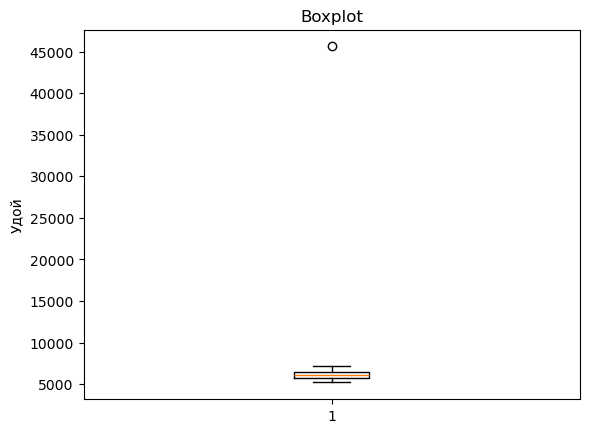

In [73]:
plt.boxplot(ferma_main['удой_кг'])
plt.title('Boxplot')
plt.ylabel('Удой');

Так же можно заметить выюрос в данных

Просмотр уникальных значений

In [74]:
ferma_main['удой_кг'].sort_values(ascending=False)

16     45616
70      7222
135     7207
296     7201
294     7197
       ...  
578     5235
322     5215
589     5213
397     5207
273     5204
Name: удой_кг, Length: 634, dtype: int64

Просмотр строчки с выбросом

In [75]:
ferma_maina.loc[ferma_main['удой_кг']==45616]

,удой_кг,энергетическая_кормовая_единица,сырой_протеин_г,сахаро_протеиновое_соотношение,порода,тип_пастбища,порода_папы_быка,процент_жирности,процент_белка,вкус_молока,возраст
16,45616,11.5,1675,0.93,Вис Бик Айдиал,Холмистое,Айдиал,3.22,3.076,вкусно,более_2_лет


In [76]:
ferma_main_dad=ferma_main_dad.loc[ferma_main_dad['удой_кг']!=45616]

Удалим данную строчку

In [77]:
ferma_main=ferma_maina.loc[ferma_main['удой_кг']!=45616]

Выведем результат

In [78]:
ferma_main['удой_кг'].sort_values(ascending=False)

70     7222
135    7207
296    7201
294    7197
593    7174
       ... 
578    5235
322    5215
589    5213
397    5207
273    5204
Name: удой_кг, Length: 628, dtype: int64

построим боксплот для столбика 'удой_кг' для просмотра изменений

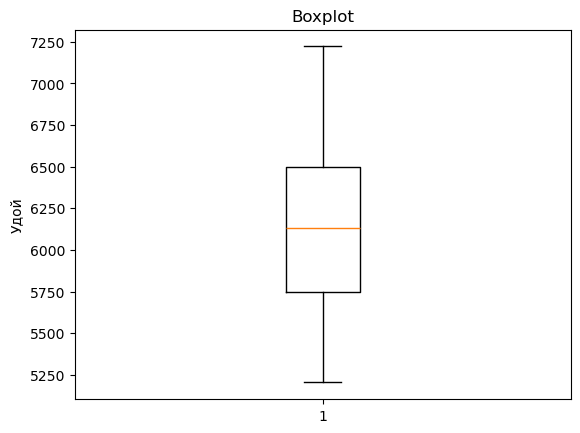

In [79]:
plt.boxplot(ferma_main['удой_кг'])
plt.title('Boxplot')
plt.ylabel('Удой');

Построим гистограмму для наглядного представления данных

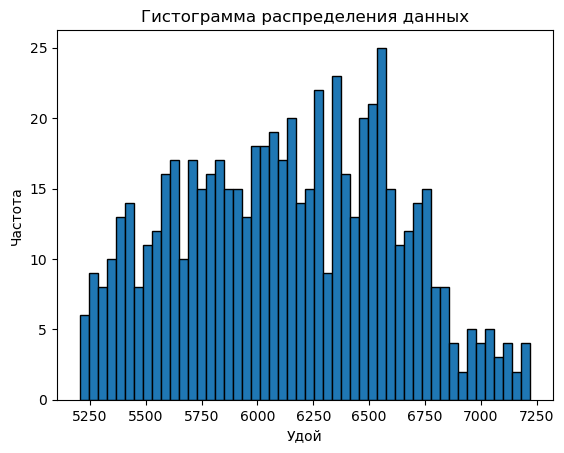

In [80]:
plt.hist(ferma_main['удой_кг'], bins=50, edgecolor='black')
plt.title('Гистограмма распределения данных')
plt.xlabel('Удой')
plt.ylabel('Частота');

Построим боксплот для стобца 'энергетическая_кормовая_единица'

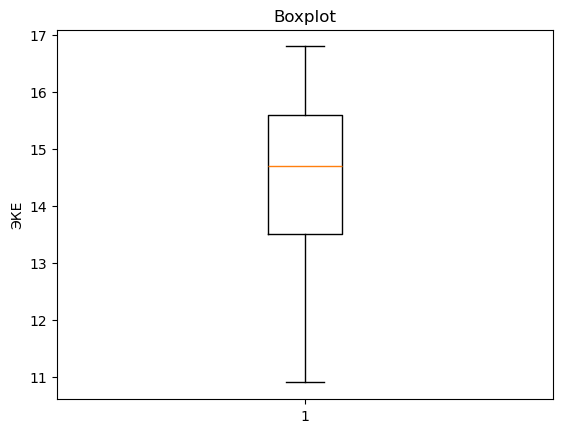

In [81]:
plt.boxplot(ferma_main['энергетическая_кормовая_единица'])
plt.title('Boxplot')
plt.ylabel('ЭКЕ');

Построим гистограмму для наглядного представления данных

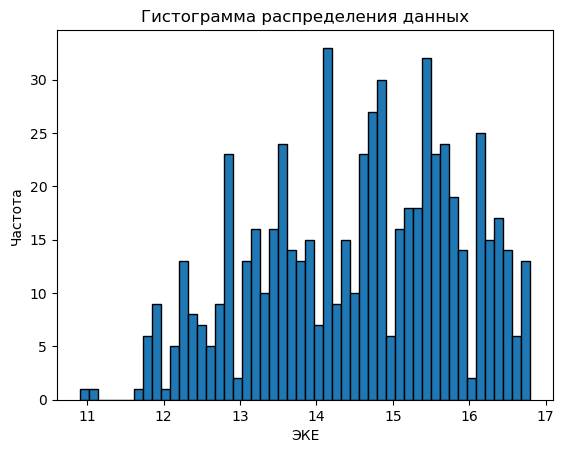

In [82]:
plt.hist(ferma_main['энергетическая_кормовая_единица'], bins=50, edgecolor='black')
plt.title('Гистограмма распределения данных')
plt.xlabel('ЭКЕ')
plt.ylabel('Частота');

Построим боксплот для стобца 'сырой_протеин_г'

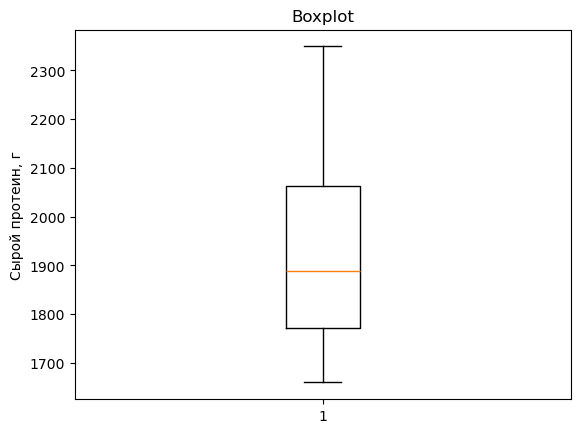

In [83]:
plt.boxplot(ferma_main['сырой_протеин_г'])
plt.title('Boxplot')
plt.ylabel('Сырой протеин, г');

Построим гистограмму для наглядного представления данных

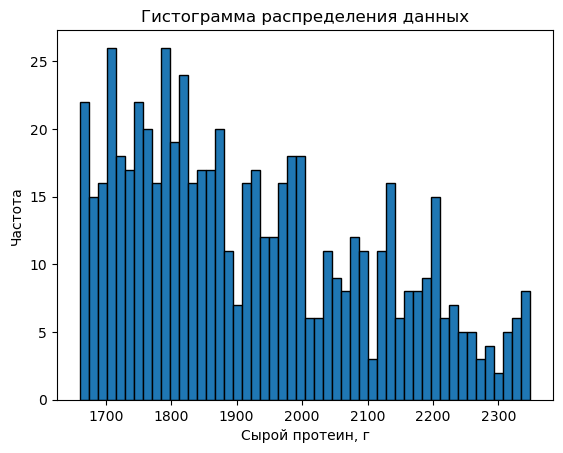

In [84]:
plt.hist(ferma_main['сырой_протеин_г'], bins=50, edgecolor='black')
plt.title('Гистограмма распределения данных')
plt.xlabel('Сырой протеин, г')
plt.ylabel('Частота');

Построим боксплот для стобца 'сахаро_протеиновое_соотношение'

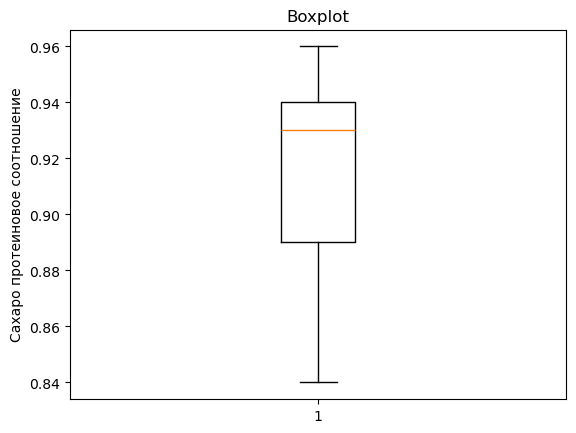

In [85]:
plt.boxplot(ferma_main['сахаро_протеиновое_соотношение'])
plt.title('Boxplot')
plt.ylabel('Сахаро протеиновое соотношение');

Построим гистограмму для наглядного представления данных

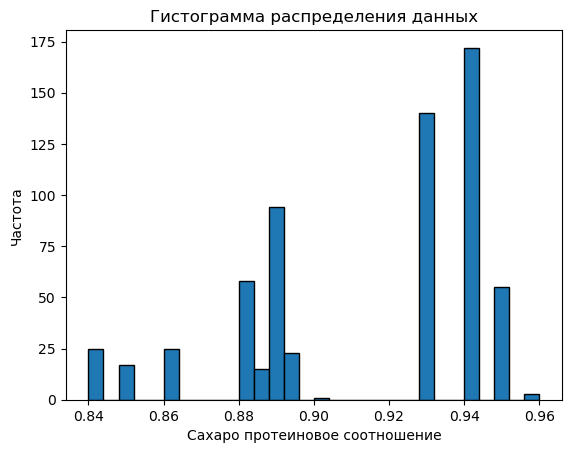

In [86]:
plt.hist(ferma_main['сахаро_протеиновое_соотношение'], bins=30, edgecolor='black')
plt.title('Гистограмма распределения данных')
plt.xlabel('Сахаро протеиновое соотношение')
plt.ylabel('Частота');

Построим диаграмму для вывода процентного соотношения столбца 'порода'

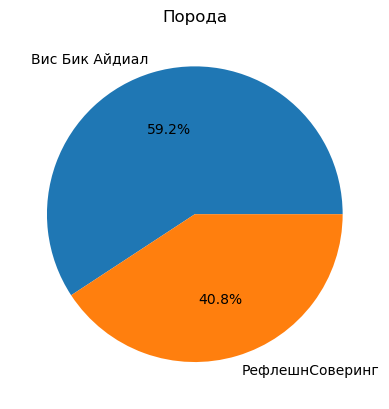

In [87]:
circle=ferma_main['порода'].value_counts(normalize=True)*100
plt.pie(circle, labels=circle.index, autopct='%1.1f%%')
plt.title('Порода');

Построим диаграмму для вывода процентного соотношения столбца 'тип_пастбища'

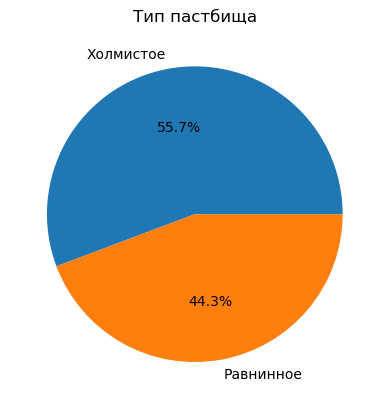

In [88]:
circle=ferma_main['тип_пастбища'].value_counts(normalize=True)*100
plt.pie(circle, labels=circle.index, autopct='%1.1f%%')
plt.title('Тип пастбища');

Построим диаграмму для вывода процентного соотношения столбца 'порода_папы_быка'

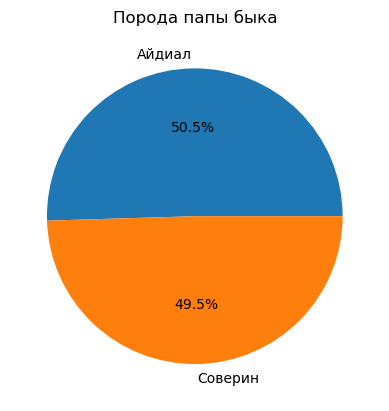

In [89]:
circle=ferma_main['порода_папы_быка'].value_counts(normalize=True)*100
plt.pie(circle, labels=circle.index, autopct='%1.1f%%')
plt.title('Порода папы быка');

Построим боксплот для стобца 'процент_жирности'

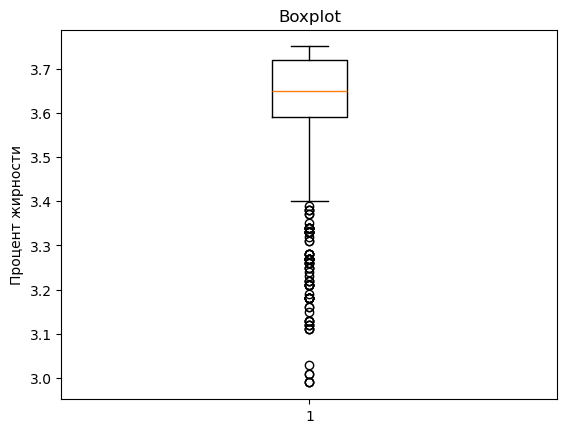

In [90]:
plt.boxplot(ferma_main['процент_жирности'])
plt.title('Boxplot')
plt.ylabel('Процент жирности');

Построим гистограмму для наглядного представления данных

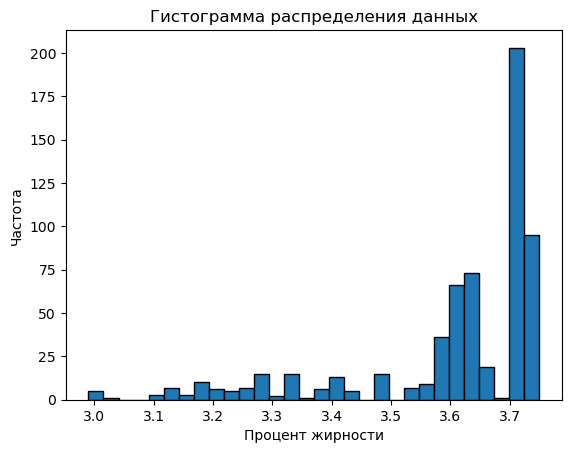

In [91]:
plt.hist(ferma_main['процент_жирности'], bins=30, edgecolor='black')
plt.title('Гистограмма распределения данных')
plt.xlabel('Процент жирности')
plt.ylabel('Частота');

Построим боксплот для стобца 'процент_белка'

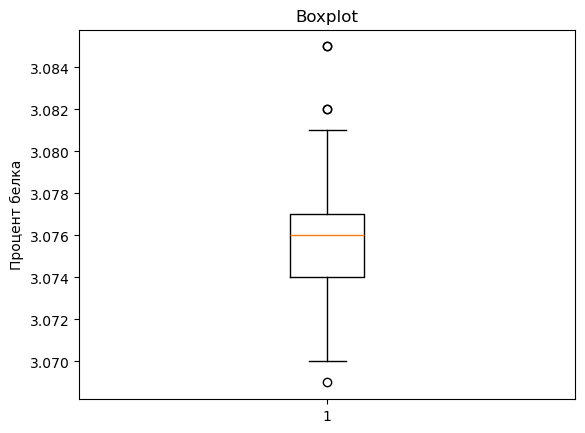

In [92]:
plt.boxplot(ferma_main['процент_белка'])
plt.title('Boxplot')
plt.ylabel('Процент белка');

Построим гистограмму для наглядного представления данных

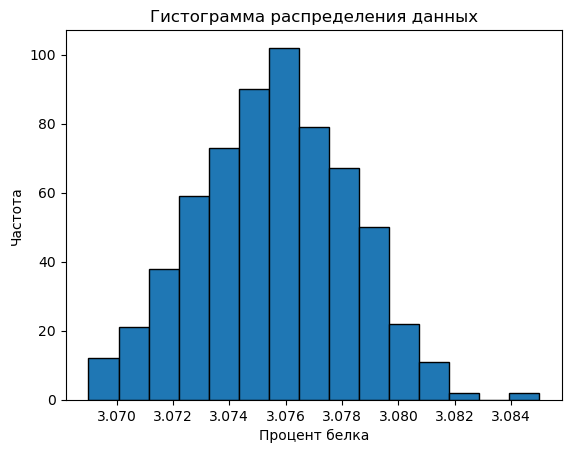

In [93]:
plt.hist(ferma_main['процент_белка'], bins=15, edgecolor='black')
plt.title('Гистограмма распределения данных')
plt.xlabel('Процент белка')
plt.ylabel('Частота');

Построим диаграмму для вывода процентного соотношения столбца 'вкус_молока'

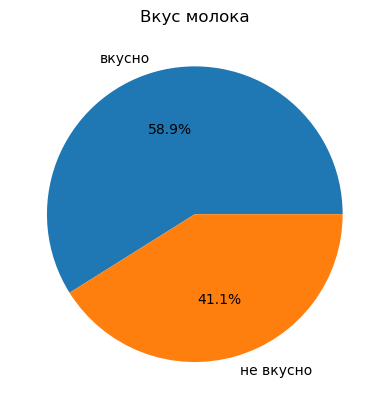

In [94]:
circle=ferma_main['вкус_молока'].value_counts(normalize=True)*100
plt.pie(circle, labels=circle.index, autopct='%1.1f%%')
plt.title('Вкус молока');

Построим диаграмму для вывода процентного соотношения столбца 'возраст'

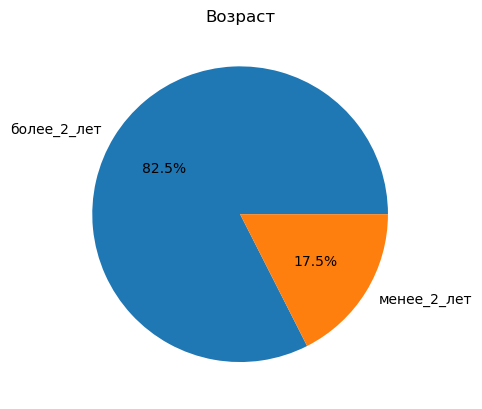

In [95]:
circle=ferma_main['возраст'].value_counts(normalize=True)*100
plt.pie(circle, labels=circle.index, autopct='%1.1f%%')
plt.title('Возраст');

<b>Вывод:</b>

- Проведение анализа всех признаков, включая количественные и категориальные. Для количественных признаков были построены гистограммы, ящики с усами, а для категориальных - круговые диаграммы.

- Для признака "Удой, кг" был обнаружен выброс, однако после его удаления распределение признака напоминает нормальное с небольшими перепадами вверх/вниз.

- Для признаков "ЭКЕ", "Сырой протеин" и "СПО" выбросов не было обнаружено. Медианные значения для них соответственно - 14.7, 188 и 0.93.

- Для категориального признака "Порода" большая часть коров относится к породе "Вис Бик Айдиал".

- Для признака "Тип пастбища" большая часть пастбищ является холмистыми.

- Для признака "Порода папы быка" породы распределены равномерно.

- Для признака "Жирность" медианное значение - 3.65. Есть значения, которые сильно выделяются (жирность менее 3.4%), однако, молоко с жирностью 3% это нормально, поэтому удаление выбросов не было произведено.

- Для признака "Белок" были обнаружены 3 значения, которые могут считаться выбросами, но они не сильно отличаются от остальных значений, поэтому удаление их не было произведено. Медианное значение - 3.076.

- Более 60% молока считается вкусным.

- Более 80% коров имеет возраст более 2 лет.

## Корреляционный анализ

Построим матрицу корреляции для 'ferma_main'

In [96]:
ferma_main.corr()

,удой_кг,энергетическая_кормовая_единица,сырой_протеин_г,сахаро_протеиновое_соотношение,процент_жирности,процент_белка
удой_кг,1.000000,0.765098,0.446731,0.806339,0.600902,0.002966
энергетическая_кормовая_единица,0.765098,1.000000,0.387875,0.749007,0.637279,-0.008939
сырой_протеин_г,0.446731,0.387875,1.000000,0.446332,0.357793,0.226802
сахаро_протеиновое_соотношение,0.806339,0.749007,0.446332,1.000000,0.629098,0.073718
процент_жирности,0.600902,0.637279,0.357793,0.629098,1.000000,-0.026542
процент_белка,0.002966,-0.008939,0.226802,0.073718,-0.026542,1.000000


для наглядности выведем тепловую карту 

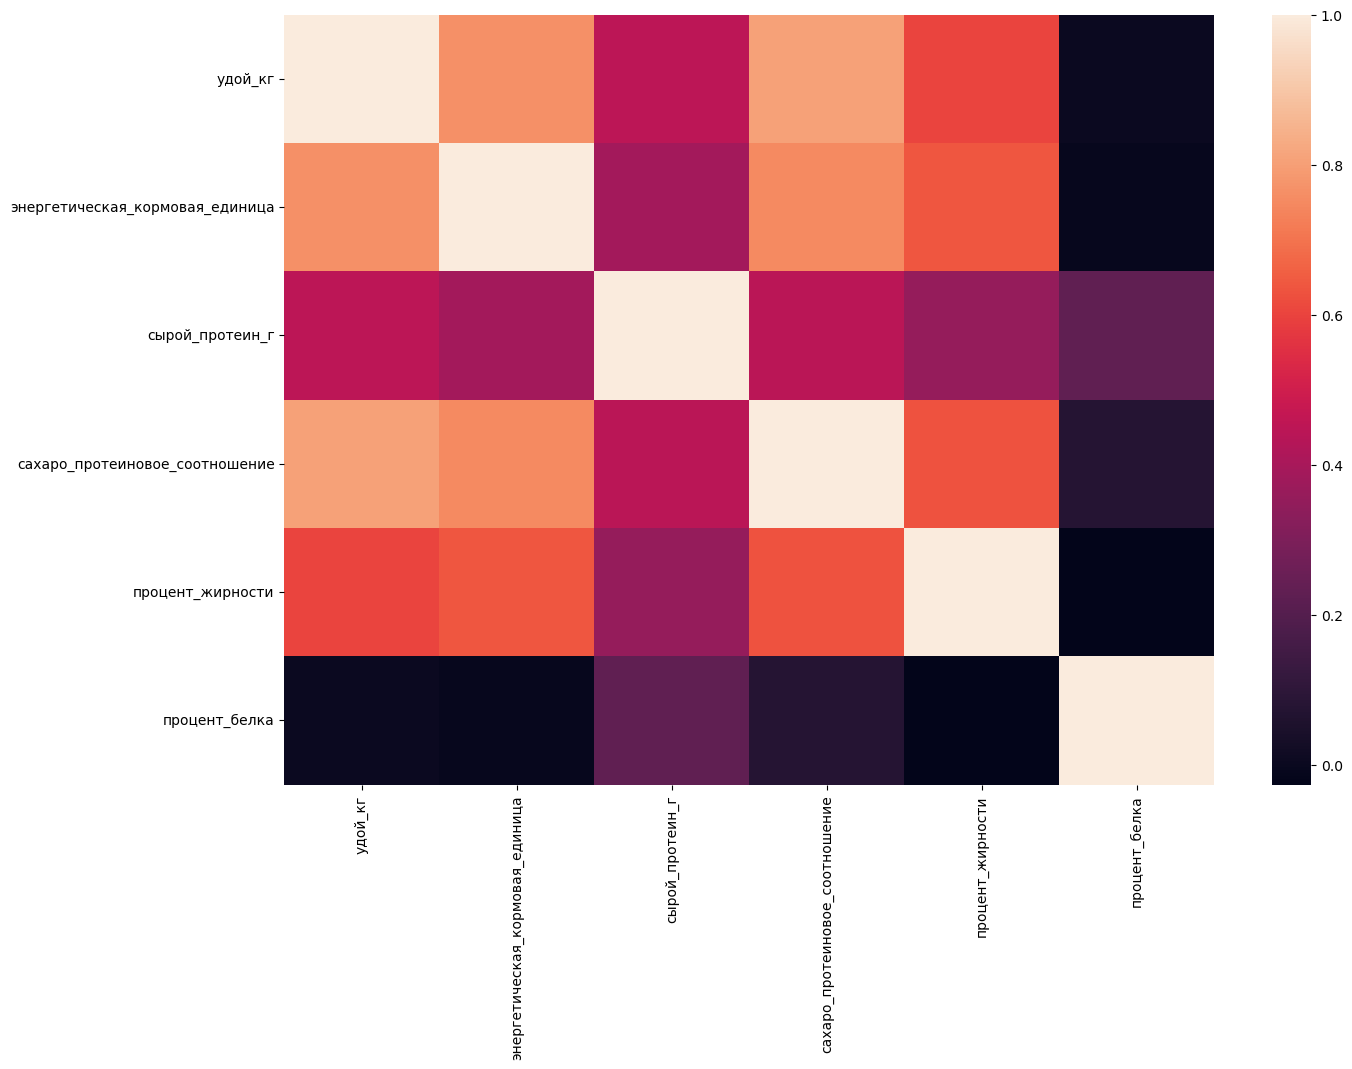

In [97]:
plt.figure(figsize = (15,10))
sns.heatmap(ferma_main.corr());

Построим точечные диаграммы:
- Удой и ЭКЕ;
- Удой и сахаро протеиновое соотношение;
- Удой и % жирности.

Text(0.5, 1.0, 'Точечная диаграмма для удой_кг 3')

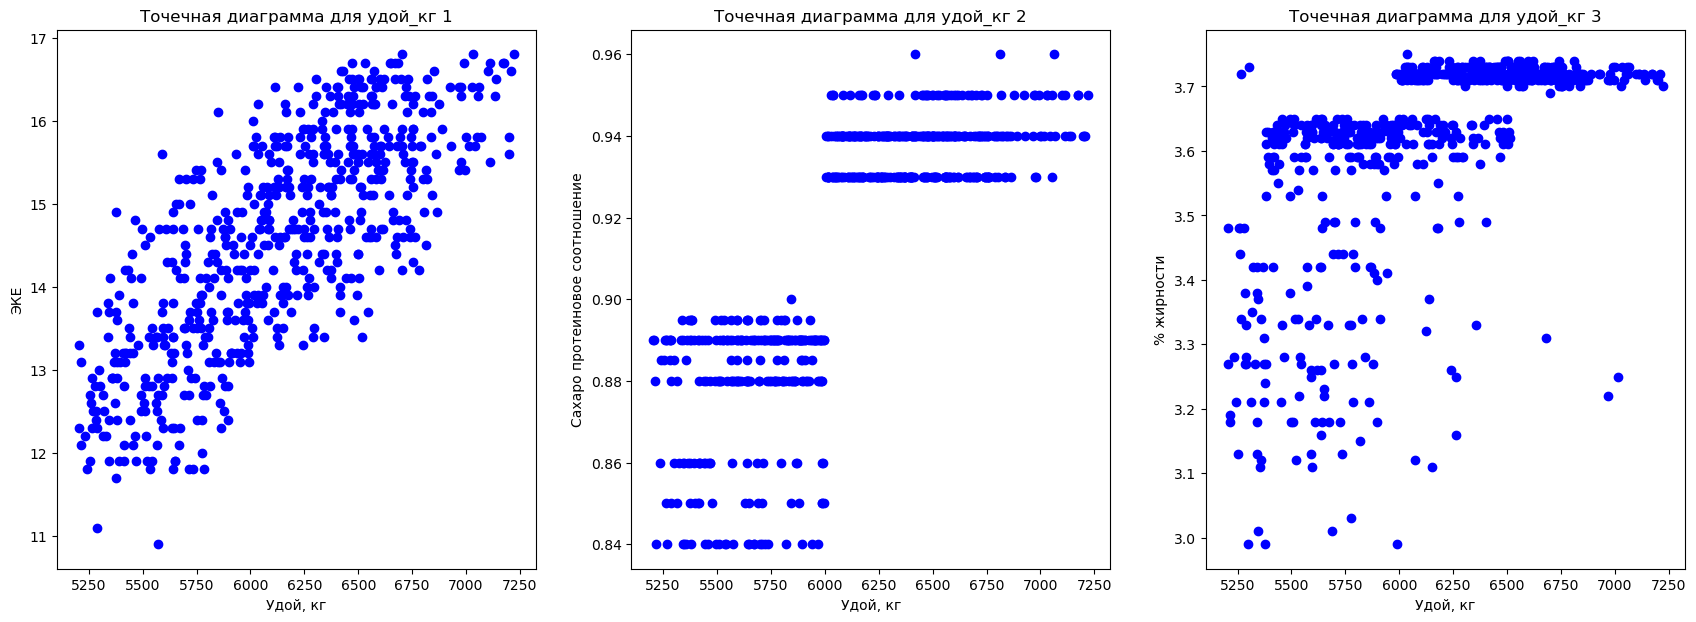

In [98]:
fig, axs = plt.subplots(1, 3, figsize=(21, 7))

# Первый график
axs[0].scatter(ferma_main['удой_кг'], ferma_main['энергетическая_кормовая_единица'], c='blue')
axs[0].set_xlabel('Удой, кг')
axs[0].set_ylabel('ЭКЕ')
axs[0].set_title('Точечная диаграмма для удой_кг 1')

# Второй график
axs[1].scatter(ferma_main['удой_кг'], ferma_main['сахаро_протеиновое_соотношение'], c='blue')
axs[1].set_xlabel('Удой, кг')
axs[1].set_ylabel('Сахаро протеиновое соотношение')
axs[1].set_title('Точечная диаграмма для удой_кг 2')

# Третий график
axs[2].scatter(ferma_main['удой_кг'], ferma_main['процент_жирности'], c='blue')
axs[2].set_xlabel('Удой, кг')
axs[2].set_ylabel('% жирности')
axs[2].set_title('Точечная диаграмма для удой_кг 3')

In [99]:
ferma_main.head()

,удой_кг,энергетическая_кормовая_единица,сырой_протеин_г,сахаро_протеиновое_соотношение,порода,тип_пастбища,порода_папы_быка,процент_жирности,процент_белка,вкус_молока,возраст
0,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


In [100]:
ferma_main['сахаро_протеиновое_соотношение'].unique()

array([0.89 , 0.885, 0.93 , 0.94 , 0.895, 0.95 , 0.96 , 0.85 , 0.84 ,
       0.86 , 0.88 , 0.9  ])

Точечные диаграммы для:
- ЭКЕ и сахаро протеиновое соотношение;
- ЭКЕ и % жирности.

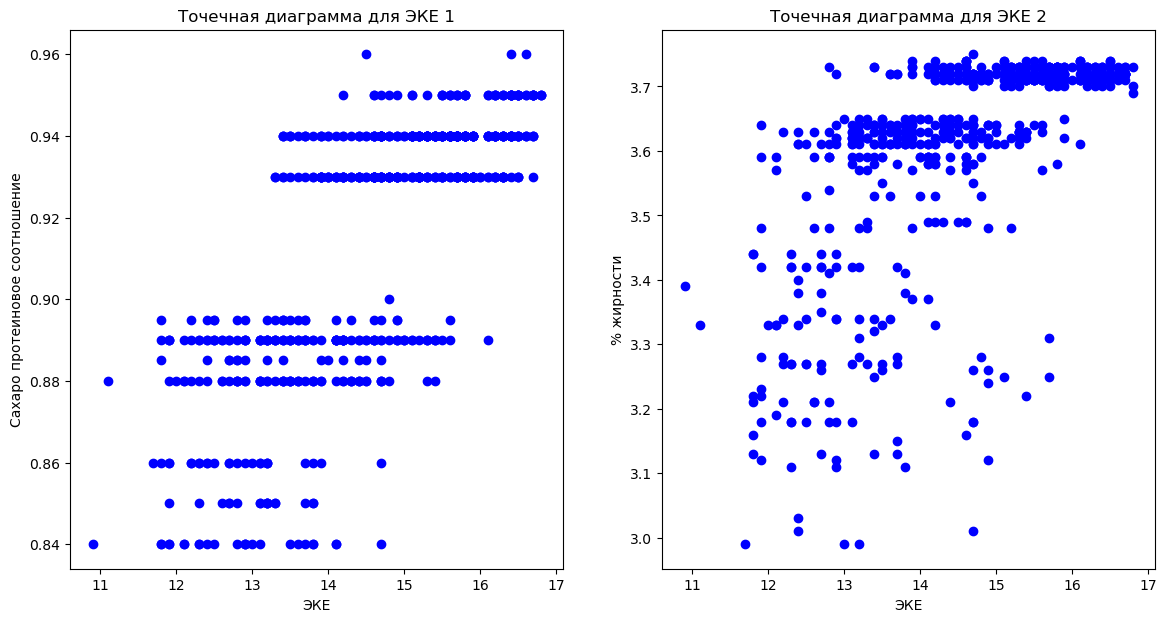

In [101]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Первый график
axs[0].scatter(ferma_main['энергетическая_кормовая_единица'], ferma_main['сахаро_протеиновое_соотношение'], c='blue')
axs[0].set_xlabel('ЭКЕ')
axs[0].set_ylabel('Сахаро протеиновое соотношение')
axs[0].set_title('Точечная диаграмма для ЭКЕ 1')

# Второй график
axs[1].scatter(ferma_main['энергетическая_кормовая_единица'], ferma_main['процент_жирности'], c='blue')
axs[1].set_xlabel('ЭКЕ')
axs[1].set_ylabel('% жирности')
axs[1].set_title('Точечная диаграмма для ЭКЕ 2');

И точечная диаграмма для:
- Сахаро протеиновое соотношение и % жирности.

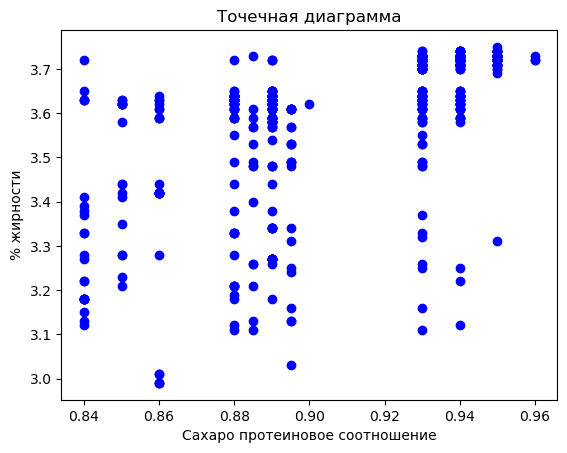

In [102]:
plt.scatter(ferma_main['сахаро_протеиновое_соотношение'], ferma_main['процент_жирности'], c='blue')
plt.xlabel('Cахаро протеиновое соотношение')
plt.ylabel('% жирности')
plt.title('Точечная диаграмма');

<b>Вывод:</b>
Можно заметить что присутствуют сильные корреляции:
- Удой и ЭКЕ;
- Удой и сахаро протеиновое соотношение;
- Удой и % жирности;
- ЭКЕ и сахаро протеиновое соотношение;
- ЭКЕ и % жирности;
- Сахаро протеиновое соотношение и % жирности.

## Обучение модели линейной регрессии

Построим модель машинного обучения

Разделение датасета за

In [103]:
y = ferma_main['удой_кг']
X = ferma_main.drop(columns=['удой_кг'])
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)

Разделение столбцов

In [104]:
numeric_columns=['энергетическая_кормовая_единица','сырой_протеин_г','сахаро_протеиновое_соотношение','процент_жирности','процент_белка']
object_columns=['порода','тип_пастбища','порода_папы_быка','вкус_молока','возраст']

Преобразование категориальных признаков

In [105]:
encoder = OneHotEncoder()
X_train_ohe = encoder.fit_transform(X_train[object_columns])
X_test_ohe = encoder.transform(X_test[object_columns])
encoder_col_names = encoder.get_feature_names_out(object_columns)

Масштабирование данных методом Min-Max scaling

In [106]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_columns])
X_test_scaled = scaler.transform(X_test[numeric_columns])

Преобразование данных в датафрейм

In [107]:
X_train_ohe = pd.DataFrame(X_train_ohe.toarray(), columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe.toarray(), columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=numeric_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numeric_columns)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

Обучение модели

In [108]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

Вывод коэффициент R^2

In [109]:
predictions=model_lr.predict(X_test)
r2=r2_score(y_test, predictions) 
r2

0.7972246633383901

Модель предсказывает неточно

Вывод коэффициент MAE

In [110]:
mae=mean_absolute_error(y_test, predictions)
mae

156.78473685741523

Вывод коэффициент MSE

In [111]:
mse=mean_squared_error(y_test, predictions)
mse

41277.9542093211

Вывод коэффициент RMSE

In [112]:
rmse=mean_squared_error(y_test, predictions, squared=False)
rmse

203.16976696674408

In [113]:
residuals = y_test - predictions

Построение гистограммы по полученным данным

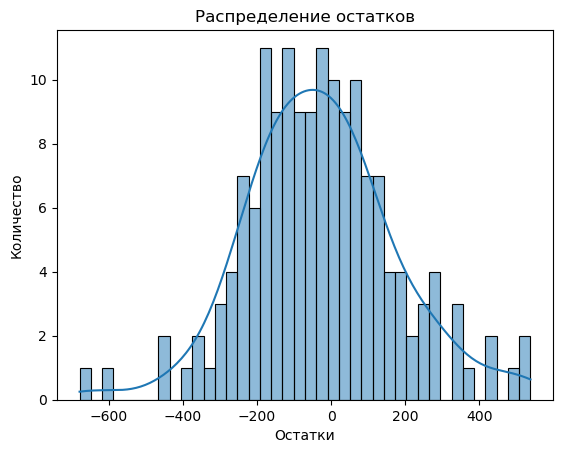

In [114]:
sns.histplot(data = residuals, bins = 40, kde=True)
plt.xlabel('Остатки')
plt.ylabel('Количество')
plt.title('Распределение остатков')  
plt.show()

На гистограмме видно отклонение влево и это говорит нам о том что модель завышает прогнозные значение

Построение точечной диаграммы

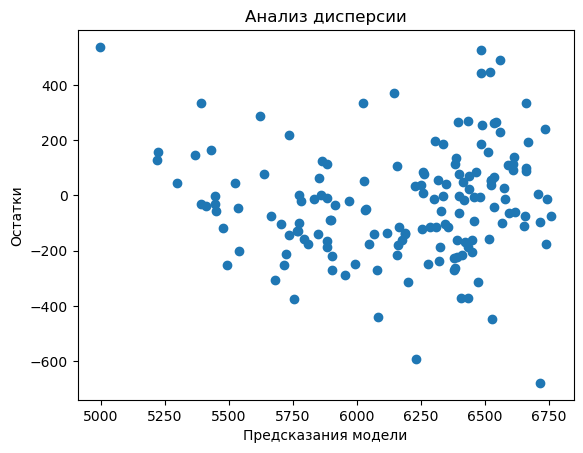

In [115]:
plt.scatter(predictions, residuals)
plt.xlabel('Предсказания модели')
plt.ylabel('Остатки')
plt.title('Анализ дисперсии')
plt.show()

график боксплот

Text(0.5, 1.0, 'Разброс значений признаков')

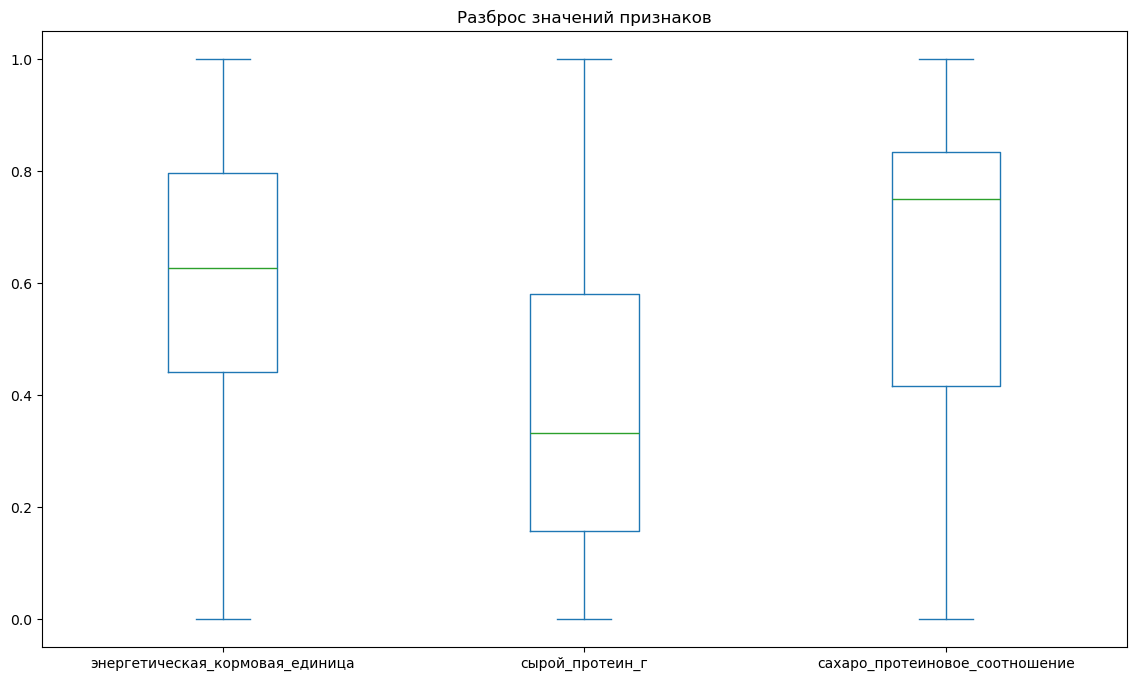

In [136]:
fig, ax = plt.subplots(figsize=(14, 8))
X_train[numeric_columns].plot(kind='box', ax=ax)
ax.set_title('Разброс значений признаков')

Проделаем подобную работу но в этот раз уберем показатели которые не влияют на количества получаемого молока

In [118]:
y = ferma_main['удой_кг']
X = ferma_main.drop(columns=['удой_кг', 'процент_жирности', 'процент_белка', 'вкус_молока'])
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)
numeric_columns=['энергетическая_кормовая_единица','сырой_протеин_г','сахаро_протеиновое_соотношение']
object_columns=['порода','тип_пастбища','порода_папы_быка','возраст']
encoder = OneHotEncoder()
X_train_ohe = encoder.fit_transform(X_train[object_columns])
X_test_ohe = encoder.transform(X_test[object_columns])
encoder_col_names = encoder.get_feature_names_out(object_columns)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_columns])
X_test_scaled = scaler.transform(X_test[numeric_columns])
X_train_ohe = pd.DataFrame(X_train_ohe.toarray(), columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe.toarray(), columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=numeric_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numeric_columns)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)
r2 = r2_score(y_test, predictions) 
r2

0.7844078173416968

Модель немного ухудшилась

Вывод коэффициент MAE

In [119]:
mae=mean_absolute_error(y_test, predictions)
mae

164.2419446347492

Вывод коэффициент MSE

In [120]:
mse=mean_squared_error(y_test, predictions)
mse

43887.015009660485

Вывод коэффициент RMSE

In [121]:
rmse=mean_squared_error(y_test, predictions, squared=False)
rmse

209.49227911706075

In [122]:
residuals = y_test - predictions

Построение гистограммы

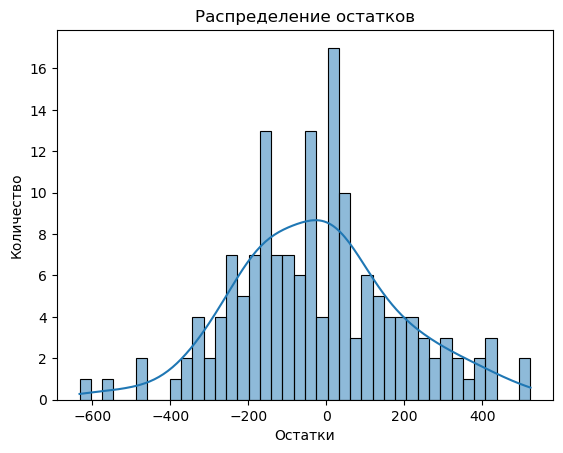

In [123]:
sns.histplot(data = residuals, bins = 40, kde=True)
plt.xlabel('Остатки')
plt.ylabel('Количество')
plt.title('Распределение остатков')  
plt.show()

Гистограмма так же увеличивает значения

Построение точечной диаграммы

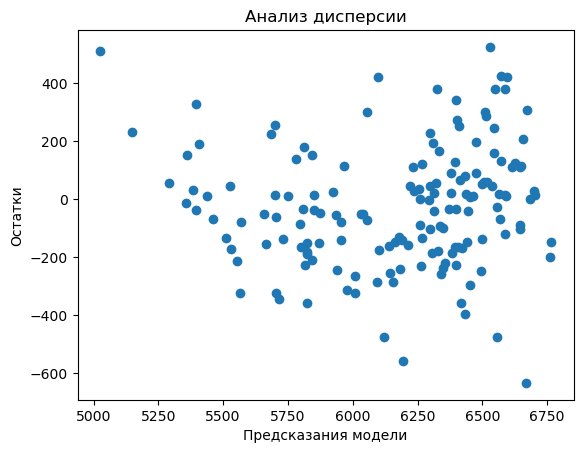

In [124]:
plt.scatter(predictions, residuals)
plt.xlabel('Предсказания модели')
plt.ylabel('Остатки')
plt.title('Анализ дисперсии')
plt.show()

График боксплота

Text(0.5, 1.0, 'Разброс значений признаков')

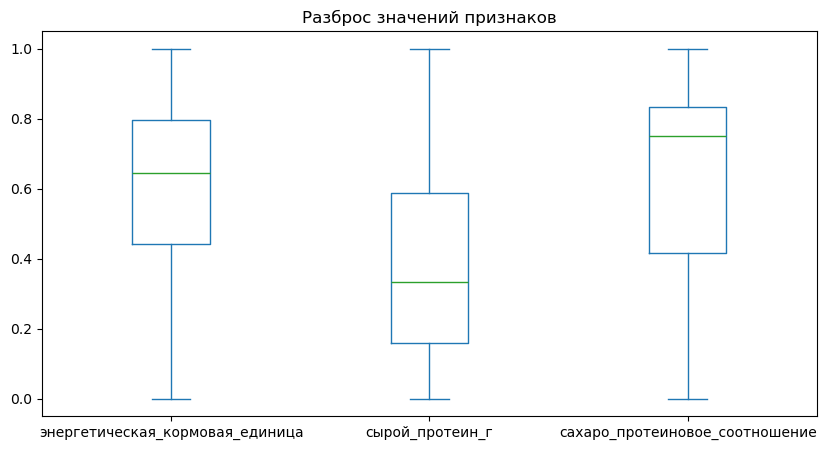

In [125]:
fig, ax = plt.subplots(figsize=(10, 5))
X_train[numeric_columns].plot(kind='box', ax=ax)
ax.set_title('Разброс значений признаков')

Проделаем подобную работу но в этот раз добавим имя отца

In [127]:
y = ferma_main_dad['удой_кг']
X = ferma_main_dad.drop(columns=['удой_кг','id'])
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)
numeric_columns=['энергетическая_кормовая_единица','сырой_протеин_г','сахаро_протеиновое_соотношение','процент_жирности','процент_белка']
object_columns=['порода','тип_пастбища','порода_папы_быка','вкус_молока','возраст', 'имя_папы']
encoder = OneHotEncoder()
X_train_ohe = encoder.fit_transform(X_train[object_columns])
X_test_ohe = encoder.transform(X_test[object_columns])
encoder_col_names = encoder.get_feature_names_out(object_columns)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_columns])
X_test_scaled = scaler.transform(X_test[numeric_columns])
X_train_ohe = pd.DataFrame(X_train_ohe.toarray(), columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe.toarray(), columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=numeric_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numeric_columns)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)
r2 = r2_score(y_test, predictions) 
r2

0.7775738016533882

Показатель ухудшился

Вывод коэффициент MAE

In [128]:
mae=mean_absolute_error(y_test, predictions)
mae

154.61566417946986

Вывод коэффициент MSE

In [129]:
mse=mean_squared_error(y_test, predictions)
mse

41713.4712479376

Вывод коэффициент RMSE

In [130]:
rmse=mean_squared_error(y_test, predictions, squared=False)
rmse

204.2387603956154

In [131]:
residuals = y_test - predictions

Вывод гистограммы

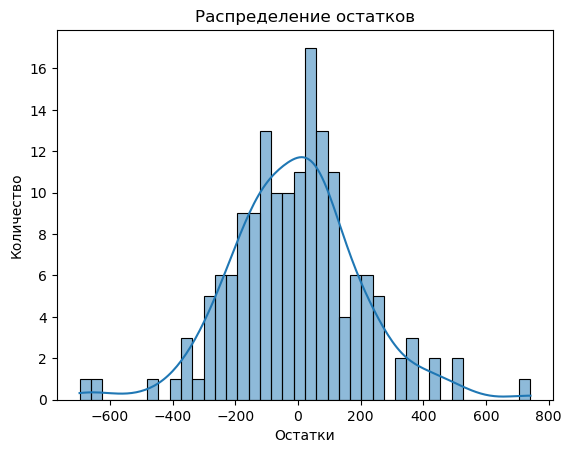

In [132]:
sns.histplot(data = residuals, bins = 40, kde=True)
plt.xlabel('Остатки')
plt.ylabel('Количество')
plt.title('Распределение остатков')  
plt.show()

Гистограмма показывает нормальное распределение

Построение точечной диаграммы

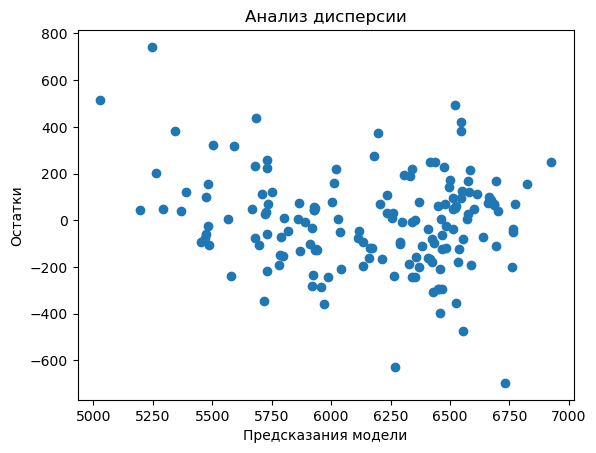

In [133]:
plt.scatter(predictions, residuals)
plt.xlabel('Предсказания модели')
plt.ylabel('Остатки')
plt.title('Анализ дисперсии')
plt.show()

Построение боксплота

Text(0.5, 1.0, 'Разброс значений признаков')

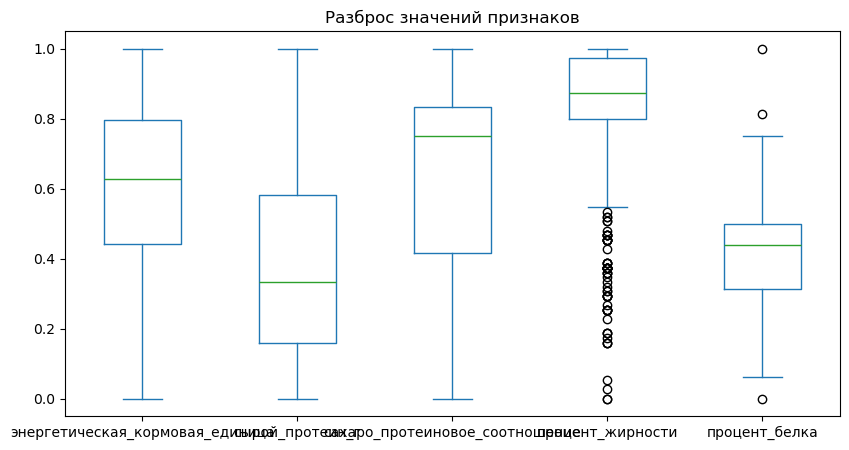

In [134]:
fig, ax = plt.subplots(figsize=(10, 5))
X_train[numeric_columns].plot(kind='box', ax=ax)
ax.set_title('Разброс значений признаков')

Попробуем убрать из полных данных показатели которые не влияют на количество получаемого молока

In [135]:
y = ferma_main_dad['удой_кг']
X = ferma_main_dad.drop(columns=['удой_кг','процент_жирности', 'процент_белка', 'вкус_молока','id'])
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)
numeric_columns=['энергетическая_кормовая_единица','сырой_протеин_г','сахаро_протеиновое_соотношение']
object_columns=['порода','тип_пастбища','порода_папы_быка','возраст', 'имя_папы']
encoder = OneHotEncoder()
X_train_ohe = encoder.fit_transform(X_train[object_columns])
X_test_ohe = encoder.transform(X_test[object_columns])
encoder_col_names = encoder.get_feature_names_out(object_columns)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_columns])
X_test_scaled = scaler.transform(X_test[numeric_columns])
X_train_ohe = pd.DataFrame(X_train_ohe.toarray(), columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe.toarray(), columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=numeric_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numeric_columns)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)
r2 = r2_score(y_test, predictions) 
r2

0.778379608725692

Показатель улучшился на немного

Вывод коэффициент MAE

In [137]:
mae=mean_absolute_error(y_test, predictions)
mae

156.43543535114068

Вывод коэффициент MSE

In [138]:
mse=mean_squared_error(y_test, predictions)
mse

41562.35141407005

Вывод коэффициент RMSE

In [139]:
rmse=mean_squared_error(y_test, predictions, squared=False)
rmse

203.86846596290965

In [140]:
residuals = y_test - predictions

Построение гистограммы

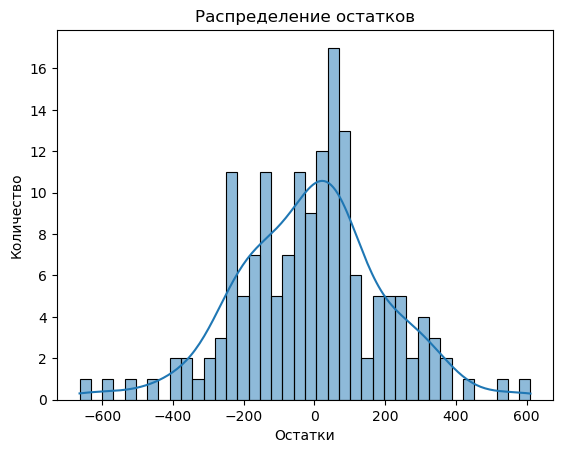

In [141]:
sns.histplot(data = residuals, bins = 40, kde=True)
plt.xlabel('Остатки')
plt.ylabel('Количество')
plt.title('Распределение остатков')  
plt.show()

Гистограмма показывает нормальное распределение

Построение точечной диаграммы

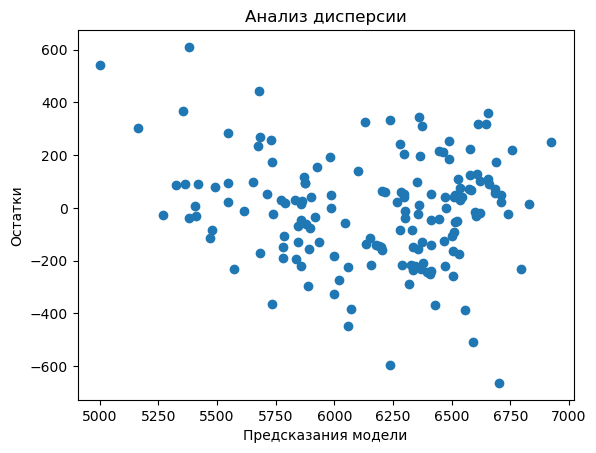

In [142]:
plt.scatter(predictions, residuals)
plt.xlabel('Предсказания модели')
plt.ylabel('Остатки')
plt.title('Анализ дисперсии')
plt.show()

Построение боксплота

Text(0.5, 1.0, 'Разброс значений признаков')

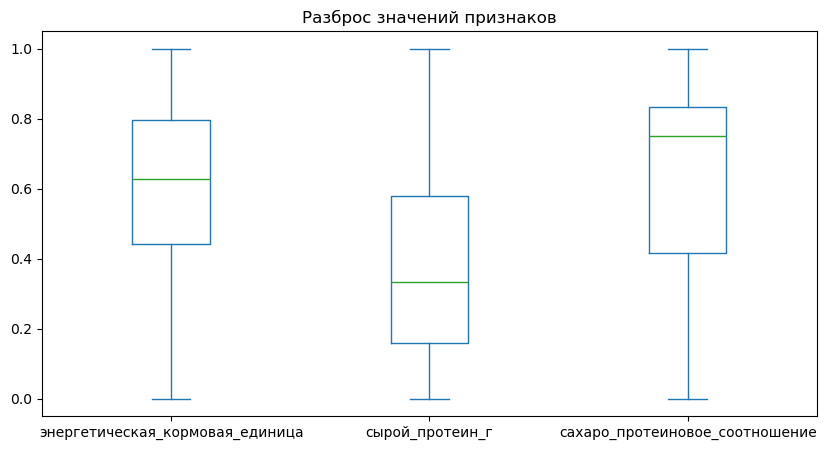

In [143]:
fig, ax = plt.subplots(figsize=(10, 5))
X_train[numeric_columns].plot(kind='box', ax=ax)
ax.set_title('Разброс значений признаков')

<b>Вывод:</b>

## Обучение модели логистической регрессии

## Итоговые выводы